## Linear Regression and Learning Curve challenges

### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)

logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [100]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
noise = np.random.normal(0,1,100)
x = range(1, 101)
y = 50 + 30*np.log(x) + noise
sim_data = pd.DataFrame({'y' : y,
 'x' : x,
  })


In [4]:
results = smf.ols(formula = "y ~ x^2", data = sim_data).fit()

### Quadratic Model

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     11.12
Date:                Mon, 25 Jul 2016   Prob (F-statistic):            0.00120
Time:                        14:12:50   Log-Likelihood:                -468.45
No. Observations:                 100   AIC:                             940.9
Df Residuals:                      98   BIC:                             946.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        71.5481     26.461      2.704      0.008        19.037   124.059
x ^ 2[T.True]    88.6968     26.594      3.335      0.001        35.922   141.472
==============================================================================
Omnibus:                       36.832   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.635
Skew:                          -1.530   Prob(JB):                     1.25e-15
Kurtosis:                       5.666   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log Model

In [6]:
results = smf.ols(formula = "y ~ np.log(x)", data = sim_data).fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.530e+04
Date:                Mon, 25 Jul 2016   Prob (F-statistic):          3.05e-143
Time:                        14:12:52   Log-Likelihood:                -141.55
No. Observations:                 100   AIC:                             287.1
Df Residuals:                      98   BIC:                             292.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     50.5449      0.409    123.548      0.000        49.733    51.357
np.log(x)     29.9151      0.109    274.411      0.000        29.699    30.131
==============================================================================
Omnibus:                        0.902   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.937
Skew:                          -0.095   Prob(JB):                        0.626
Kurtosis:                       2.566   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [8]:
x = range(1, 201)
noise = np.random.normal(0,1,200)
squared_x = [i**2 for i in x]
y = 140 + 6*np.asarray(x) + 25*np.asarray(squared_x) + noise

In [9]:
sim_data = pd.DataFrame({'y' : y,
 'x' : x,
  })

In [10]:
# fit true model
from patsy import dmatrices
from sklearn import cross_validation as cv
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
y, X = dmatrices("y ~ x + x^2", data = sim_data, return_type='dataframe')
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)

In [12]:
model = LinearRegression().fit(x_train, y_train)
# we compare our predicted ys to the actual ys. So this is our mean_squared error for training set
print metrics.mean_squared_error(y_train, model.predict(x_train))
# comparing our predicted y's for the test to our actual test ys, this is test error
print metrics.mean_squared_error(y_test, model.predict(x_test))

5508106368.09
5204507887.26


### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error

test error

R squared

AIC

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [140]:
polys = ["y ~ Constant", "y ~ x", "y ~ x + x^2", "y ~ x + x^2 + x^3", "y ~ x + x^2 + x^3 + x^4", 
         "y ~ x + x^2 + x^3 + x^4 + x^5", "y ~ x + x^2 + x^3 + x^4 + x^5 + x^6", 
         "y ~ x + x^2 + x^3 + x^4 + x^5 + x^6 + x^7"]

In [146]:
sim_data["Constant"] = np.ones(200)

In [151]:
test_errors = []
train_errors = []
R_squareds = []
for model in polys:
    y, X = dmatrices(model, data = sim_data, return_type='dataframe') 
    x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)
    model = LinearRegression().fit(x_train, y_train)
    train_error = metrics.mean_squared_error(y_train, model.predict(x_train))
    train_errors.append(train_error)
    test_error = metrics.mean_squared_error(y_test, model.predict(x_test))
    test_errors.append(test_error)
    r_sq = metrics.r2_score(y_train, model.predict(x_train))
    R_squareds.append(r_sq)


In [155]:
md = range(0, 8)

In [156]:
model_degrees = pd.DataFrame({'model degree' : md,
 'Testing' : test_errors,
 'Training' : train_errors, 
  'R Squared': R_squareds})

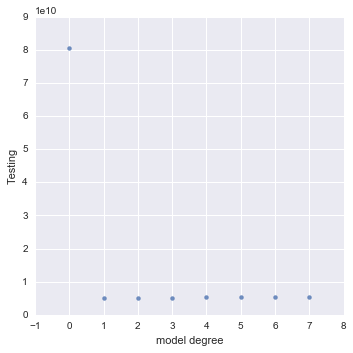

In [161]:
md_test_plt = sns.lmplot(x = "model degree", y = "Testing", data = model_degrees, fit_reg = False)


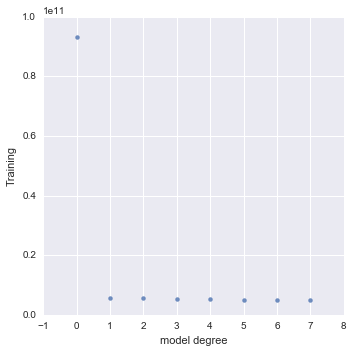

In [162]:
md_train_plt = sns.lmplot(x = "model degree", y = "Training", data = model_degrees, fit_reg = False)

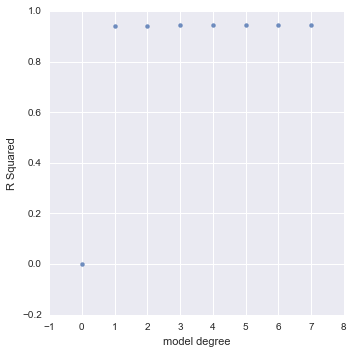

In [163]:
md_rsq_plt = sns.lmplot(x = "model degree", y = "R Squared", data = model_degrees, fit_reg = False)


### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [118]:
training_errors = []
testing_errors = []
m = []
for i in np.arange(5, len(X), 5): 
    y, X = dmatrices("y ~ x + x^2", data = sim_data, return_type='dataframe')
    x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size = (1 - (i/float(len(X)))),random_state=1234)
    model = LinearRegression().fit(x_train, y_train)
    training_error = metrics.mean_squared_error(y_train, model.predict(x_train))
    training_errors.append(training_error)
    testing_error = metrics.mean_squared_error(y_test, model.predict(x_test))
    testing_errors.append(testing_error)
    m.append(i)

In [123]:
dif_sizes = pd.DataFrame({'m' : m,
 'Testing' : testing_errors,
  'Training' : training_errors})

In [124]:
dif_sizes.head()

,Testing,Training,m
0,6.869824e+09,6.800599e+08,5
1,5.832931e+09,1.773651e+09,10
2,5.949005e+09,2.120109e+09,15
3,6.423127e+09,2.446356e+09,20
4,6.316946e+09,2.447339e+09,25


In [126]:
# reformat data into tidy; 2nd column is "testing error" y/n, 3rd column is error
dif_sizes_rf = pd.melt(dif_sizes, id_vars=['m'], value_vars=['Training', 'Testing'])

In [127]:
dif_sizes_rf.head()

,m,variable,value
0,5,Training,6.800599e+08
1,10,Training,1.773651e+09
2,15,Training,2.120109e+09
3,20,Training,2.446356e+09
4,25,Training,2.447339e+09


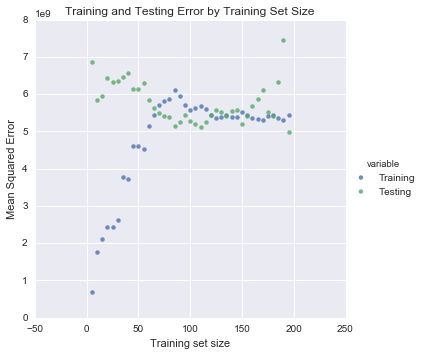

In [134]:
sct_plot = sns.lmplot(x = "m", y = "value", hue = "variable", data = dif_sizes_rf, fit_reg = False)
sct_plot.set(title = "Training and Testing Error by Training Set Size", xlabel = "Training set size", ylabel = "Mean Squared Error")
